In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
import tensorflow as tf

# 1. 역률평균 시각화

In [14]:
|with open("/content/drive/MyDrive/time_series/SOH/Combined_LabelledData_18_역률평균.json", "r", encoding="utf-8") as f:
    content = f.read()
    json_data = json.loads(content)

In [15]:
print(type(json_data))

<class 'dict'>


In [16]:
print(json_data['data'][0])

{'ITEM_NAME': '누적전력량', 'ITEM_VALUE': 838462, 'TIMESTAMP': '2020-09-16 00:00:00', 'LABEL_NAME': '주의'}


In [17]:
for_soh = json_data['data'][:]

In [18]:
len(for_soh)

1864800

In [19]:
all_data = []
for i in for_soh:
  if i['ITEM_NAME'] == '역률평균':
    all_data.append(i)

In [20]:
pd_all_data = pd.DataFrame(all_data)

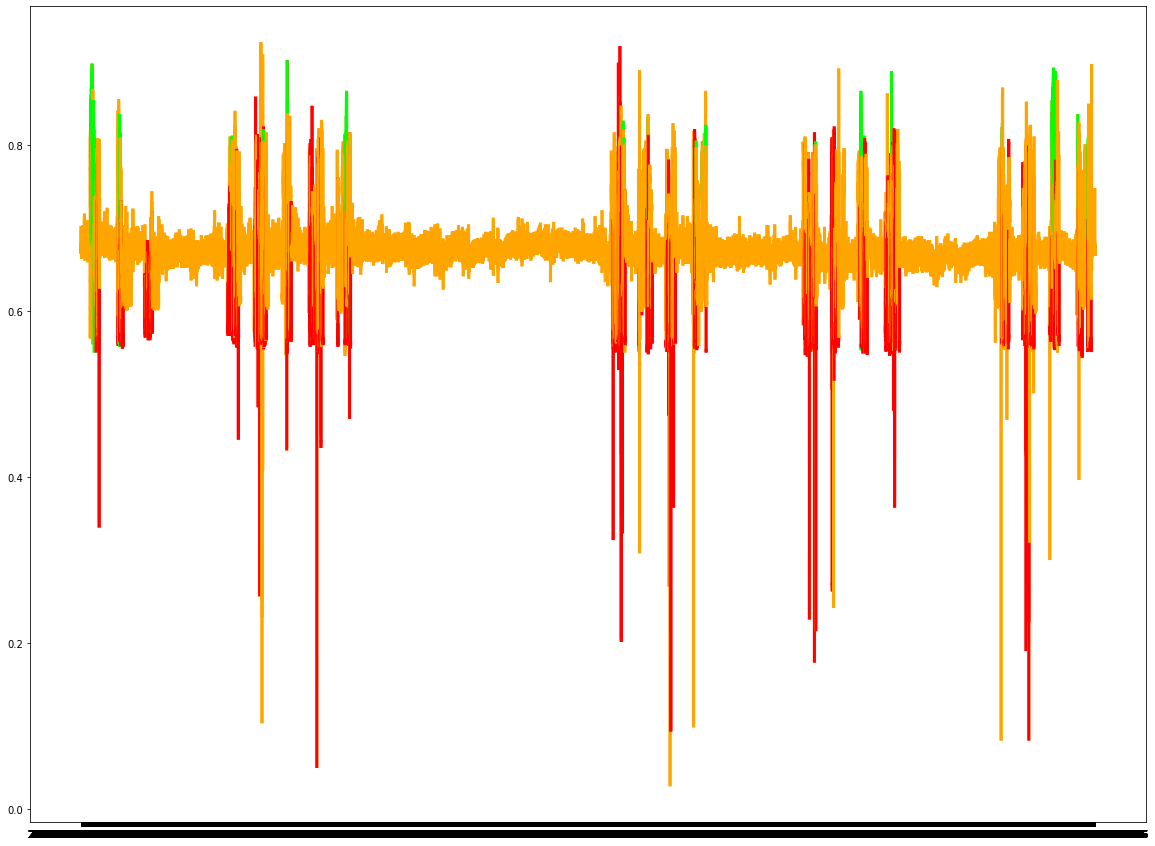

In [23]:
%matplotlib inline
color = ["#FF0000", "#00FF00", "#FFA500"]
c_count = 0

plt.figure(figsize=(20,15))
for i in range(len(pd_all_data) - 1):
  if labels[i] == '정상':
    c = color[1]
  elif labels[i] == '주의':
    c = color[2]
  else:
    c = color[0]
  
  plt.plot([pd_all_data['TIMESTAMP'][i], pd_all_data['TIMESTAMP'][i+1]], [pd_all_data['ITEM_VALUE'][i], pd_all_data['ITEM_VALUE'][i+1]], c = c, lw=3)

# 2. 전압고조파평균 시각화

In [27]:
with open("/content/drive/MyDrive/time_series/SOH/Combined_LabelledData_18_전압고조파평균.json", "r", encoding="utf-8") as f:
    content = f.read()
    voltage_json_data = json.loads(content)

In [29]:
for_soh_vol = voltage_json_data['data'][:]
all_data_vol = []
for i in for_soh_vol:
  if i['ITEM_NAME'] == '전압고조파평균':
    all_data_vol.append(i)

pd_all_data_vol = pd.DataFrame(all_data_vol)

In [30]:
print(len(pd_all_data_vol))

53280


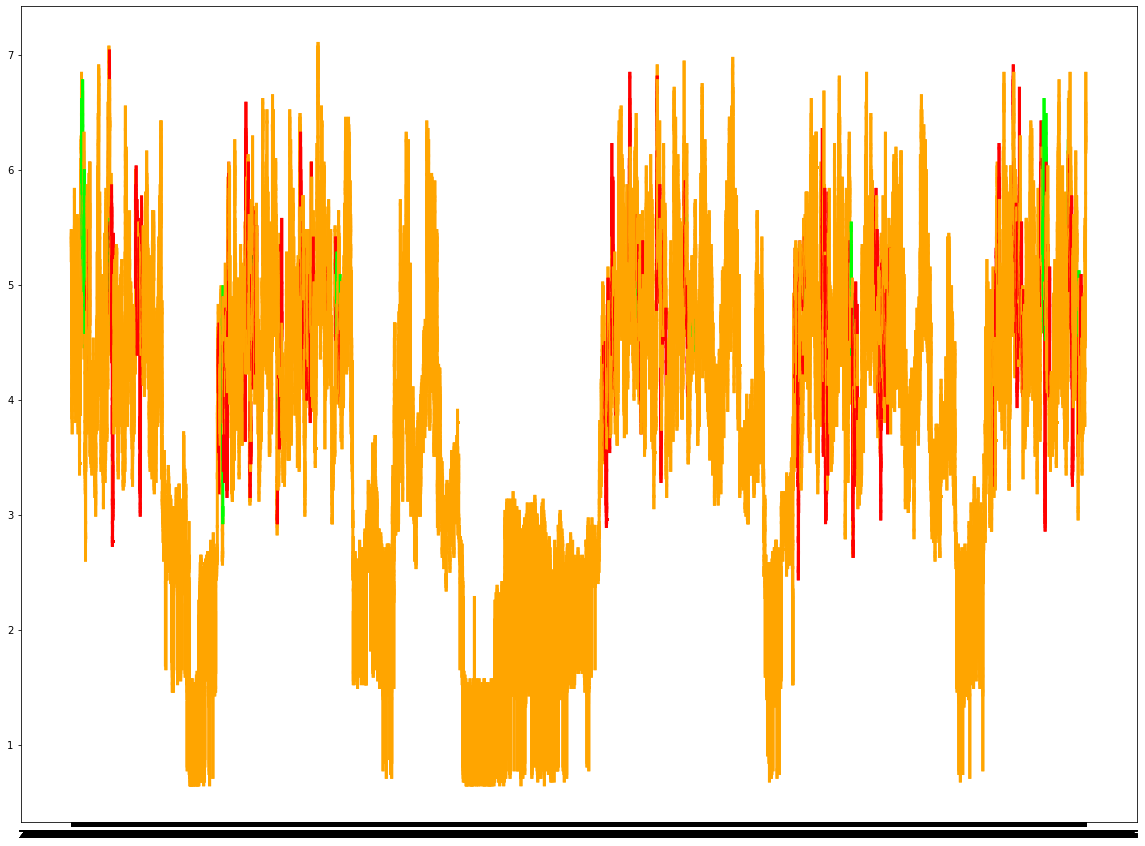

In [31]:
c_count = 0

plt.figure(figsize=(20,15))
for i in range(len(pd_all_data_vol) - 1):
  if labels[i] == '정상':
    c = color[1]
  elif labels[i] == '주의':
    c = color[2]
  else:
    c = color[0]
  
  plt.plot([pd_all_data_vol['TIMESTAMP'][i], pd_all_data_vol['TIMESTAMP'][i+1]], [pd_all_data_vol['ITEM_VALUE'][i], pd_all_data_vol['ITEM_VALUE'][i+1]], c = c, lw=3)

# 3. 전류고조파평균 시각화

In [32]:
with open("/content/drive/MyDrive/time_series/SOH/Combined_LabelledData_18_전류고조파평균.json", "r", encoding="utf-8") as f:
    content = f.read()
    ec_json_data = json.loads(content)

for_soh_ec = ec_json_data['data'][:]
all_data_ec = []
for i in for_soh_ec:
  if i['ITEM_NAME'] == '전류고조파평균':
    all_data_ec.append(i)

pd_all_data_ec = pd.DataFrame(all_data_ec)
print(len(pd_all_data_ec))

53280


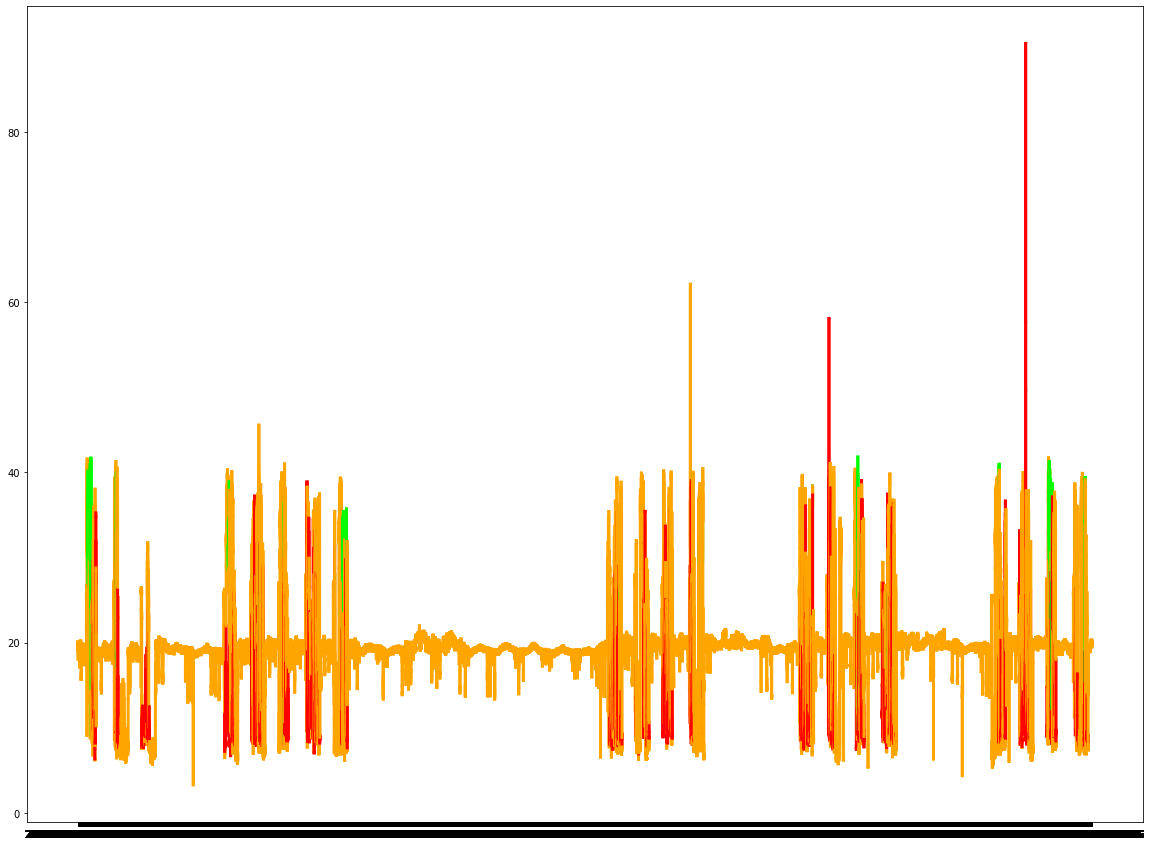

In [33]:
c_count = 0

plt.figure(figsize=(20,15))
for i in range(len(pd_all_data_ec) - 1):
  if labels[i] == '정상':
    c = color[1]
  elif labels[i] == '주의':
    c = color[2]
  else:
    c = color[0]
  
  plt.plot([pd_all_data_ec['TIMESTAMP'][i], pd_all_data_ec['TIMESTAMP'][i+1]], [pd_all_data_ec['ITEM_VALUE'][i], pd_all_data_ec['ITEM_VALUE'][i+1]], c = c, lw=3)

# How to 

In [34]:
x = np.linspace(0, 1, 11)
y_ = np.random.uniform(size = 11)
y = np.random.uniform(size=11)
label = ["lion"] * 3 + ["ant"] * 4 + ["tiger"] * 4

df = pd.DataFrame({"x":x , "y":y, "label":label})
df

,x,y,label
0,0.0,0.242510,lion
1,0.1,0.277632,lion
2,0.2,0.378008,lion
3,0.3,0.076090,ant
4,0.4,0.718185,ant
5,0.5,0.915875,ant
6,0.6,0.498004,ant
7,0.7,0.993883,tiger
8,0.8,0.455717,tiger
9,0.9,0.417028,tiger


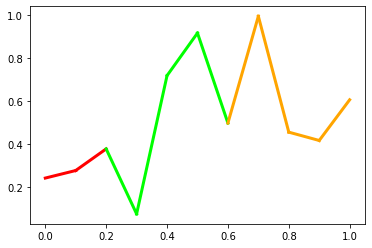

In [36]:
%matplotlib inline
color = ["#FF0000", "#00FF00", "#FFA500"]
c_count = 0
for i in range(len(x) - 1):
  if label[i] != label[i + 1]:
    c_count += 1
  plt.plot([x[i], x[i+1]], [y[i], y[i+1]], c=color[c_count], lw=3)
